**In the given kernel, I am using 50 x 50 reduced images of the original Malaria Cell Images Dataset for the purpose of classification.** The reason behind this decision was to see the effect of scaling on the classification algorithm being used.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, BatchNormalization
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['cell_images']


In [3]:
parasitized_data = os.listdir('../input/cell_images/Parasitized_VGG/')
uninfected_data = os.listdir('../input/cell_images/Uninfected_VGG/')

Use the following code to find whether Thumbs.db exists in your list of images. It consequently removes the concerned file.

In [4]:
# images_1 = os.listdir(base_address_1)
# images_0 = os.listdir(base_address_0)
# # Removing 'Thumbs.db' file from the list of images
# for img in images_1:
#     if 'Thumbs.db' in img:
#         idx = images_1.index(img)
#         images_1.pop(idx)
# for img in images_0:
#     if 'Thumbs.db' in img:
#         idx = images_0.index(img)
#         images_0.pop(idx)

In [5]:
print('The image files for Uninfected are: '+str(len(uninfected_data)))
print('The image files for Infected are: '+str(len(parasitized_data)))

The image files for Uninfected are: 13799
The image files for Infected are: 13779


In [6]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_array = cv2.imread('../input/cell_images/Parasitized_VGG/' + img)
        data.append(img_array)
        labels.append(1)
    except:
        print("Runtime Exception due to image at index "+ str(parasitized_data.index(img)))
        
for img in uninfected_data:
    try:
        img_array = cv2.imread('../input/cell_images/Uninfected_VGG' + "/" + img)
        data.append(img_array)
        labels.append(0)
    except:
        print("Runtime Exception due to image at index "+ str(uninfected_data.index(img)))

In [7]:
print(len(data))
print(len(labels))

27578
27578


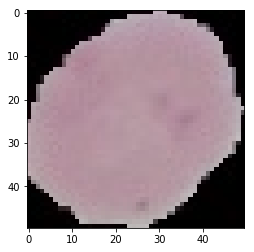

In [8]:
# Visualization an uninfected image
img = cv2.imread('../input/cell_images/Uninfected_VGG' + "/" + uninfected_data[0])
plt.imshow(img)

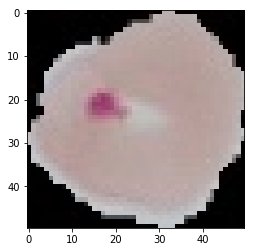

In [9]:
# Visualization an infected image
img = cv2.imread('../input/cell_images/Parasitized_VGG' + "/" + parasitized_data[0])
plt.imshow(img)

**Conversion of the lists into arrays**

In [10]:
image_data = np.array(data)
labels = np.array(labels)
# Shuffling the data 
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

**Train- Test Split**

In [11]:
# Training and Test data split
X_train, X_test, y_train, y_test = train_test_split(image_data,labels, test_size=0.20, random_state = 101) 

In [12]:
# One- Hot Encoding the lables
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [13]:
# Normalizing the data
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [14]:
########################################################################################################################
# Defining the model
###########################################################################################################################

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
__________

In [16]:
# Defining the optimizer, loss, performance of the metrcis of the model
batches = 50
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / batches)
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=batches,epochs=25,verbose=1)

Epoch 1/25
22062/22062 [==============================] - 31s 1ms/step - loss: 0.5798 - acc: 0.7010
Epoch 2/25
22062/22062 [==============================] - 31s 1ms/step - loss: 0.1962 - acc: 0.9302
Epoch 3/25
22062/22062 [==============================] - 30s 1ms/step - loss: 0.1592 - acc: 0.9464
Epoch 4/25
22062/22062 [==============================] - 30s 1ms/step - loss: 0.1433 - acc: 0.9529
Epoch 5/25
22062/22062 [==============================] - 30s 1ms/step - loss: 0.1385 - acc: 0.9527
Epoch 6/25
22062/22062 [==============================] - 30s 1ms/step - loss: 0.1306 - acc: 0.9544
Epoch 7/25
22062/22062 [==============================] - 30s 1ms/step - loss: 0.1236 - acc: 0.9572
Epoch 8/25
22062/22062 [==============================] - 30s 1ms/step - loss: 0.1185 - acc: 0.9581
Epoch 9/25
22062/22062 [==============================] - 30s 1ms/step - loss: 0.1118 - acc: 0.9612
Epoch 10/25
22062/22062 [==============================] - 31s 1ms/step - loss: 0.1059 - acc: 0.9628

* We get an accuracy of 98.27% on the training data with 25 epochs.

In [17]:
model.evaluate(X_test,y_test, steps = 1)

1/1 [==============================] - 3s 3s/step


[0.23251061141490936, 0.9532269835472107]

...and a validation accuracy of > 95%.